# Topic Modeling with LDA

## pyLDAvis Topic Modeling

In [46]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle 

#sklearn
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA

In [4]:
import warnings
warnings.filterwarnings('ignore')

/Users/scrapfish/opt/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [5]:
with open('../data_files/processed_tweets.pickle', 'rb') as read_file:
    tweets = pickle.load(read_file)

In [6]:
tweets.head()

,clean,processed
0,islam kills are you trying to say that there w...,islam kill try say terrorist attack europe ref...
1,clinton trump should ve apologized more attack...,clinton trump apologize attack little
2,who was is the best president of the past year...,well president past retweet
3,i don t have to guess your religion christmasa...,guess religion christmasaftermath
4,pence and his lawyers decided which of his off...,pence lawyer decide official email public can see


In [7]:
proc_tweets = tweets.processed

In [8]:
vectorizer = CountVectorizer(token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True,
                             stop_words='english')

In [9]:
dtm_tf = vectorizer.fit_transform(proc_tweets)
print(dtm_tf.shape)

(203482, 77822)


### 4 Topics

In [10]:
%%time

lda_4 = LatentDirichletAllocation(n_components=4, random_state=42)
lda_4.fit(dtm_tf)

CPU times: user 6min 13s, sys: 1.34 s, total: 6min 15s
Wall time: 6min 16s


LatentDirichletAllocation(n_components=4, random_state=42)

In [11]:
pyLDAvis.sklearn.prepare(lda_4, dtm_tf, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.118015 -0.099830       1        1  37.416741
2     -0.228739 -0.004533       2        1  23.605804
1      0.039376 -0.103173       3        1  20.347675
0      0.071348  0.207535       4        1  18.629780, topic_info=          Term          Freq         Total Category  logprob  loglift
70290    trump  32655.000000  32655.000000  Default  30.0000  30.0000
29776  hillary  14529.000000  14529.000000  Default  29.0000  29.0000
12598  clinton  14740.000000  14740.000000  Default  28.0000  28.0000
18828   donald   8808.000000   8808.000000  Default  27.0000  27.0000
48447    obama   9040.000000   9040.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
64969     stop    635.253375   2736.640163   Topic4  -5.9797   0.2199
12598  clinton    983.701642  14740.697530   Topic4  -5.5424  -1.0266
41340      man    650.832504   3189.106800   Topic4  -5.9555   0.0912
76160    woman    490.274488   3096.976048   Topic4  -6.2387  -0.1628
7170     black    485.036797   3365.958146   Topic4  -6.2495  -0.2568

[323 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
235        4  0.995959   abrams
534        4  0.996282    actor
694        1  0.014527    admin
694        3  0.978129    admin
694        4  0.004842    admin
...      ...       ...      ...
77323      1  0.143072  youtube
77323      2  0.003832  youtube
77323      3  0.183950  youtube
77323      4  0.668096  youtube
77756      4  0.996971       zu

[624 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

**Topic Analysis**
1. 2016 Election (main entities = Trump, Clinton; additional keywords like president, campaign, election, maga, email, fbi)
2. General Twitter - emphasis on BLM
3. Conservative Twitter (christian, conservative, pjnet, ted cruz, tea party)
4. Twitter News - negative slant

### 6 Topics

In [12]:
%%time

lda_6 = LatentDirichletAllocation(n_components=6, random_state=42)
lda_6.fit(dtm_tf)

CPU times: user 5min 26s, sys: 1.19 s, total: 5min 27s
Wall time: 5min 28s


LatentDirichletAllocation(n_components=6, random_state=42)

In [13]:
pyLDAvis.sklearn.prepare(lda_6, dtm_tf, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.071701  0.106373       1        1  24.923116
4      0.086656 -0.058648       2        1  16.990679
2      0.233922 -0.035049       3        1  16.589603
5     -0.096412  0.131392       4        1  16.178513
1      0.007485  0.062901       5        1  13.455027
0     -0.159951 -0.206969       6        1  11.863062, topic_info=           Term          Freq         Total Category  logprob  loglift
70290     trump  32581.000000  32581.000000  Default  30.0000  30.0000
29776   hillary  14665.000000  14665.000000  Default  29.0000  29.0000
12598   clinton  14901.000000  14901.000000  Default  28.0000  28.0000
18828    donald   8766.000000   8766.000000  Default  27.0000  27.0000
48447     obama   9029.000000   9029.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
12598   clinton    824.213043  14901.883666   Topic6  -5.2679  -0.7631
39700      live    484.639346   2497.113554   Topic6  -5.7990   0.4923
35279      join    369.627120   1009.475971   Topic6  -6.0699   1.1270
8679      break    372.021935   2375.056130   Topic6  -6.0634   0.2779
10053  campaign    363.353443   2606.111839   Topic6  -6.0870   0.1615

[458 rows x 6 columns], token_table=       Topic      Freq                 Term
term                                       
235        6  0.991526               abrams
390        4  0.999210              account
609        3  0.996586  addamovieruinamovie
703        1  0.202809       administration
703        2  0.005070       administration
...      ...       ...                  ...
77323      3  0.010217              youtube
77323      4  0.348657              youtube
77323      5  0.102171              youtube
77323      6  0.535119              youtube
77756      6  0.994941                   zu

[1023 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 6, 2, 1])

**Topic Analysis**
1. Trump
2. Violence
3. General Twitter
4. Clinton
5. Conservative Twitter (pjnet, christian, ted cruz, god, conservative)
6. News

### 8 Topics

In [36]:
%%time

lda_8 = LatentDirichletAllocation(n_components=8, random_state=42)
lda_8.fit(dtm_tf)

CPU times: user 5min 16s, sys: 1.1 s, total: 5min 17s
Wall time: 5min 18s


LatentDirichletAllocation(n_components=8, random_state=42)

In [37]:
pyLDAvis.sklearn.prepare(lda_8, dtm_tf, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.144239 -0.062215       1        1  19.433115
3     -0.107696 -0.089311       2        1  13.762421
4      0.052301  0.005085       3        1  13.456443
5     -0.167815 -0.020361       4        1  13.136772
2      0.172988 -0.095426       5        1  13.055712
1      0.026184 -0.030744       6        1  10.196230
6      0.175295 -0.015942       7        1   9.555397
0     -0.007018  0.308915       8        1   7.403910, topic_info=           Term          Freq         Total Category  logprob  loglift
70290     trump  32458.000000  32458.000000  Default  30.0000  30.0000
18828    donald   8767.000000   8767.000000  Default  29.0000  29.0000
12598   clinton  14902.000000  14902.000000  Default  28.0000  28.0000
29776   hillary  14685.000000  14685.000000  Default  27.0000  27.0000
55729      real   5490.000000   5490.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
54225   protest    280.655676   1149.578735   Topic8  -5.8738   1.1931
51869     photo    257.050527    749.325889   Topic8  -5.9617   1.5333
12598   clinton    363.979216  14902.086632   Topic8  -5.6139  -1.1090
20552  election    253.755889   2946.821187   Topic8  -5.9746   0.1511
52672   politic    246.188134   3863.472431   Topic8  -6.0049  -0.1501

[572 rows x 6 columns], token_table=       Topic      Freq                  Term
term                                        
235        8  0.996790                abrams
390        4  0.999291               account
607        3  0.989588     addabandtoatvshow
613        7  0.990246    addasongruinamovie
614        7  0.995770  addcartoonstohistory
...      ...       ...                   ...
76408      2  0.006047       worldofhashtags
76408      5  0.979667       worldofhashtags
76408      6  0.006047       worldofhashtags
76408      7  0.012095       worldofhashtags
77756      8  0.995405                    zu

[1401 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 5, 6, 3, 2, 7, 1])

**Topic Analysis**
1. Trump
2. Islam
3. Police Violence
4. Clinton
5. General Twitter
6. Obama
7. Conservative
8. Debates

### 12 Topics

In [38]:
%%time

lda_12 = LatentDirichletAllocation(n_components=12, random_state=42)
lda_12.fit(dtm_tf)

CPU times: user 5min 13s, sys: 1.49 s, total: 5min 14s
Wall time: 5min 16s


LatentDirichletAllocation(n_components=12, random_state=42)

In [39]:
pyLDAvis.sklearn.prepare(lda_12, dtm_tf, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.212610 -0.038392       1        1  13.146676
7      0.157138  0.038923       2        1  11.427784
4     -0.054371  0.035420       3        1   9.713007
5      0.147208 -0.049111       4        1   9.404344
2     -0.162558  0.078928       5        1   8.585114
3      0.106736  0.053614       6        1   8.110317
11    -0.049828  0.094398       7        1   7.733308
9      0.006795  0.044606       8        1   7.721338
8     -0.013763  0.074024       9        1   6.556071
6     -0.174237 -0.019850      10        1   6.517906
1     -0.107432  0.027511      11        1   6.274492
0     -0.068297 -0.340070      12        1   4.809643, topic_info=          Term          Freq         Total Category  logprob  loglift
70290    trump  32632.000000  32632.000000  Default  30.0000  30.0000
29776  hillary  14709.000000  14709.000000  Default  29.0000  29.0000
12598  clinton  14923.000000  14923.000000  Default  28.0000  28.0000
18828   donald   8799.000000   8799.000000  Default  27.0000  27.0000
55729     real   5504.000000   5504.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
12598  clinton    332.467899  14923.782172  Topic12  -5.2730  -0.7696
55917   reason    209.918640   1108.387787  Topic12  -5.7328   1.3706
46806      new    250.226779   5025.335071  Topic12  -5.5572   0.0347
46893     news    230.035271   4393.478341  Topic12  -5.6413   0.0849
73529    video    193.594362   2383.222805  Topic12  -5.8138   0.5241

[851 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
100        1  0.906006      abc
100        6  0.090601      abc
235       12  0.993418   abrams
390        4  0.933154  account
390        7  0.065545  account
...      ...       ...      ...
76572      7  0.106191    wrong
76572      8  0.421404    wrong
76572      9  0.100814    wrong
76572     12  0.001344    wrong
77756     12  0.994418       zu

[2505 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 8, 5, 6, 3, 4, 12, 10, 9, 7, 2, 1])

**Topic Analysis**
1. Trump as a candidate
2. Trump's campaign
3. Police Violence
4. Clinton
5. General Twitter
6. Also Clinton
7. General Twitter
8. Islam, refugees, ISIS
9. General Twitter
10. Conservative Twitter
11. General Twitter
12. German

## Dimension Reduction with PCA, TSNE

In [14]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [17]:
terms = vectorizer.get_feature_names()

display_topics(lda_6, terms, 15)


Topic  0
trump, news, post, new, merkel, die, debate, muss, video, politic, watch, clinton, election, anti, ist

Topic  1
obama, tcot, pjnet, ccot, trump, gop, god, wakeupamerica, election, away, day, america, plan, need, president

Topic  2
like, people, love, play, make, thing, know, time, day, life, twitter, look, tweet, think, game

Topic  3
trump, donald, hillary, clinton, real, say, president, america, maga, people, obama, politic, make, want, country

Topic  4
good, man, midnight, woman, kill, black, police, stop, say, shoot, new, islam, old, cruz, people

Topic  5
clinton, hillary, email, trump, lie, dnc, fbi, obama, say, campaign, russia, wikileaks, watch, know, news


In [18]:
topic_cols = ['news', 'conservative', 'general_twitter', 'trump', 'violence', 'clinton']

In [19]:
lda_doc_matrix = lda_6.fit_transform(dtm_tf)

In [20]:
lda_doc_matrix

array([[0.01668614, 0.01671921, 0.01676255, 0.01687818, 0.9162238 ,
        0.01673013],
       [0.02784275, 0.02785185, 0.02807543, 0.85996697, 0.02811381,
        0.0281492 ],
       [0.041671  , 0.04187765, 0.04231849, 0.79062642, 0.04172208,
        0.04178435],
       ...,
       [0.02383652, 0.02384963, 0.88057349, 0.02393875, 0.02385778,
        0.02394382],
       [0.02397061, 0.02426326, 0.02429331, 0.02403896, 0.54554694,
        0.35788692],
       [0.01862333, 0.01883651, 0.90652258, 0.01880578, 0.01866339,
        0.01854841]])

In [21]:
lda_df= pd.DataFrame(lda_doc_matrix, columns=topic_cols)

In [22]:
lda_df['label'] = lda_df.idxmax(axis=1)

In [23]:
text = pd.read_csv('../data_files/tweets.csv.zip')
lda_df['tweet'] = text['text']

In [26]:
doc_topic_df = lda_df[['tweet', 'label', 'trump', 'clinton', 'conservative', 'violence', 'news', 'general_twitter']]

In [27]:
doc_topic_df.iloc[:15, :]

,tweet,label,trump,clinton,conservative,violence,news,general_twitter
0,#IslamKills Are you trying to say that there w...,violence,0.016878,0.016730,0.016719,0.916224,0.016686,0.016763
1,"Clinton: Trump should’ve apologized more, atta...",trump,0.859967,0.028149,0.027852,0.028114,0.027843,0.028075
2,RT @ltapoll: Who was/is the best president of ...,trump,0.790626,0.041784,0.041878,0.041722,0.041671,0.042318
3,RT @jww372: I don't have to guess your religio...,violence,0.041795,0.042395,0.041748,0.789994,0.041698,0.042370
4,RT @Shareblue: Pence and his lawyers decided w...,clinton,0.279995,0.624117,0.023984,0.023941,0.024031,0.023932
5,"@ModicaGiunta me, too!",trump,0.583307,0.083338,0.083339,0.083338,0.083340,0.083338
6,RT @MDBlanchfield: You’ll never guess who twee...,clinton,0.023957,0.472339,0.023953,0.023896,0.431293,0.024562
7,RT @100PercFEDUP: New post: WATCH: DIAMOND AND...,news,0.013975,0.014038,0.013944,0.361837,0.582123,0.014082
8,RT @AriaWilsonGOP: 3 Women Face Charges After ...,violence,0.237649,0.018714,0.346659,0.359690,0.018642,0.018646
9,One of the ways to remind that #BlackLivesMatt...,violence,0.033570,0.033432,0.033460,0.832684,0.033339,0.033514


In [28]:
doc_topic_matrix = doc_topic_df[['trump', 'clinton', 'conservative', 'violence', 'news', 'general_twitter']].values

### PCA

In [31]:
%%time

pca = PCA(n_components=2)
pca_features = pca.fit_transform(doc_topic_matrix)

CPU times: user 2.15 s, sys: 295 ms, total: 2.45 s
Wall time: 244 ms


In [86]:
def plot_PCA(data, target, target_names, colors, title=None):
    plt.figure(figsize=(10,10), dpi=100)
    for c, label in zip(colors, target_names):
        plt.scatter(data[target == label, 0], data[target == label, 1],
                   c=c, label=label, alpha=0.5, s=.75)
    lgnd = plt.legend(fontsize=10, prop={'size':12}, loc='upper right', frameon=False)
    
    for i in range(len(target_names)):
        lgnd.legendHandles[i]._sizes = [50]
    
    if title is not None:
        plt.title(title, fontsize=16)
        
    sns.despine()
    #plt.savefig('../img/lda_pca_plot.png')
    plt.show();
    

In [73]:
target = doc_topic_df['label']
target_names = list(target.unique())
colors = ['b', 'g', 'r', 'c', 'm', 'y']

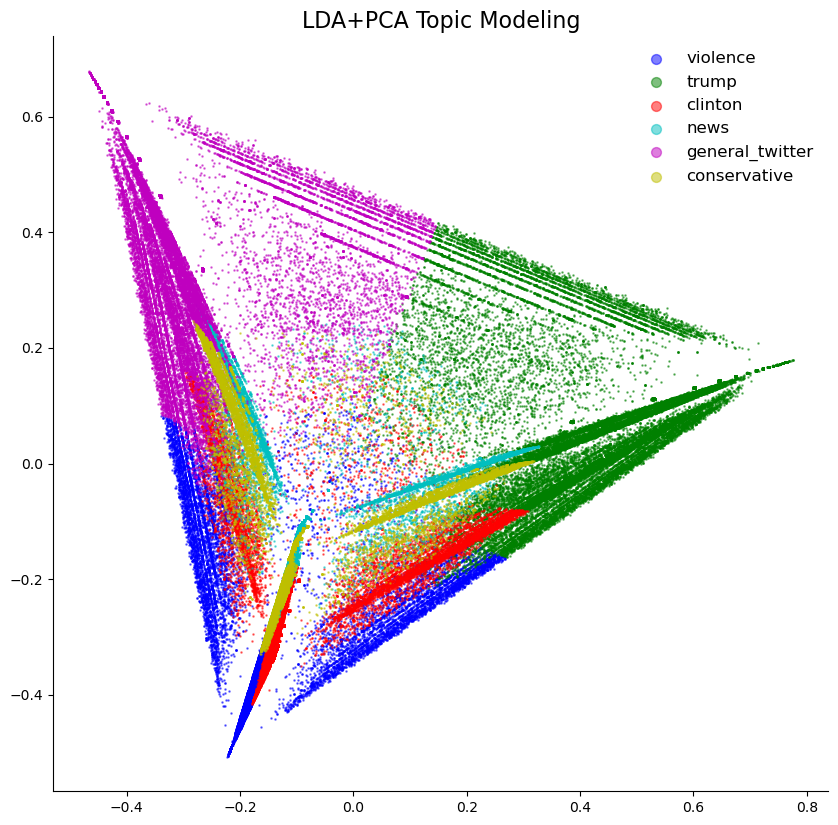

In [87]:
plot_PCA(pca_features, target=target, target_names=target_names, colors=colors, title='LDA+PCA Topic Modeling')

### TSNE

In [40]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=37)

In [41]:
tsne_lda = tsne_model.fit_transform(doc_topic_matrix)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 203482 samples in 0.251s...
[t-SNE] Computed neighbors for 203482 samples in 10.458s...
[t-SNE] Computed conditional probabilities for sample 1000 / 203482
[t-SNE] Computed conditional probabilities for sample 2000 / 203482
[t-SNE] Computed conditional probabilities for sample 3000 / 203482
[t-SNE] Computed conditional probabilities for sample 4000 / 203482
[t-SNE] Computed conditional probabilities for sample 5000 / 203482
[t-SNE] Computed conditional probabilities for sample 6000 / 203482
[t-SNE] Computed conditional probabilities for sample 7000 / 203482
[t-SNE] Computed conditional probabilities for sample 8000 / 203482
[t-SNE] Computed conditional probabilities for sample 9000 / 203482
[t-SNE] Computed conditional probabilities for sample 10000 / 203482
[t-SNE] Computed conditional probabilities for sample 11000 / 203482
[t-SNE] Computed conditional probabilities for sample 12000 / 203482
[t-SNE] Computed conditional probab

[t-SNE] Computed conditional probabilities for sample 124000 / 203482
[t-SNE] Computed conditional probabilities for sample 125000 / 203482
[t-SNE] Computed conditional probabilities for sample 126000 / 203482
[t-SNE] Computed conditional probabilities for sample 127000 / 203482
[t-SNE] Computed conditional probabilities for sample 128000 / 203482
[t-SNE] Computed conditional probabilities for sample 129000 / 203482
[t-SNE] Computed conditional probabilities for sample 130000 / 203482
[t-SNE] Computed conditional probabilities for sample 131000 / 203482
[t-SNE] Computed conditional probabilities for sample 132000 / 203482
[t-SNE] Computed conditional probabilities for sample 133000 / 203482
[t-SNE] Computed conditional probabilities for sample 134000 / 203482
[t-SNE] Computed conditional probabilities for sample 135000 / 203482
[t-SNE] Computed conditional probabilities for sample 136000 / 203482
[t-SNE] Computed conditional probabilities for sample 137000 / 203482
[t-SNE] Computed con

In [90]:
def plot_tsne(data, target, target_names, colors, title=None):
    
    plt.figure(figsize=(10, 8), dpi=100)
    for c, label in zip(colors, target_names):
        plt.scatter(data[target == label, 0], data[target == label, 1], c=c, label=label, s=0.5, alpha=0.6)
    lgnd = plt.legend(fontsize=10, prop={'size':12}, loc='upper right', frameon=False)
    for i in range(len(target_names)):
        lgnd.legendHandles[i]._sizes = [50]
    sns.despine()
    plt.xlim(-50, 65)
    plt.ylim(-50, 65)
    
    if title is not None:
        plt.title(title, fontsize=16)
    
    #plt.savefig('../img/lda_tsne_plot.png')
    plt.show();

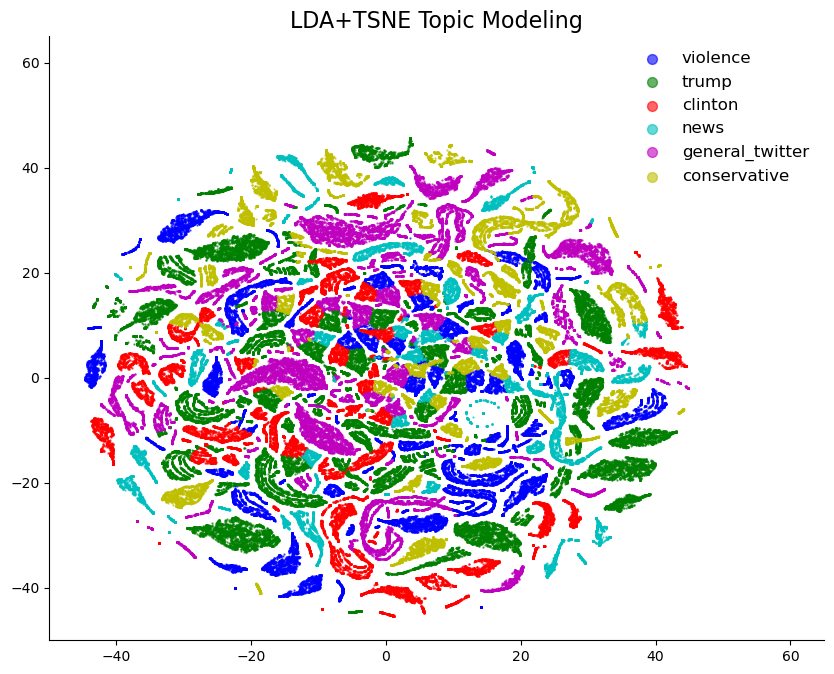

In [91]:
plot_tsne(tsne_lda, target, target_names, colors, title='LDA+TSNE Topic Modeling')